In [25]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")


df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [27]:
from sklearn.model_selection import train_test_split

# 從原始的 data DataFrame 中抽出 10% 的數據
new_df, df3 = train_test_split(df, test_size=0.1, random_state=42)

# 檢查 df3 和 data 的形狀
print("df3 的形狀：", df3.shape)
print("data 的形狀：", new_df.shape)

df3 的形狀： (28481, 31)
data 的形狀： (256326, 31)


153.9882968894364


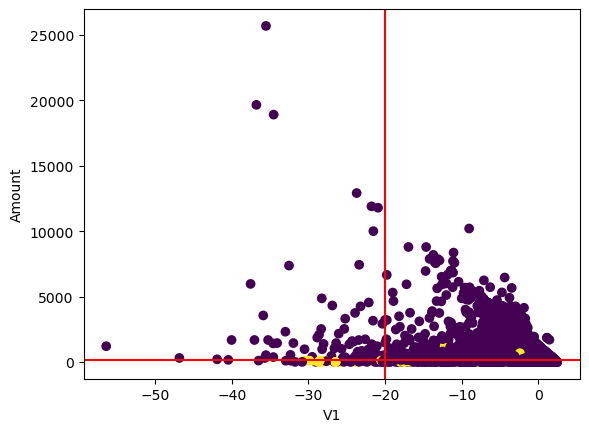

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 設定特徵A的閾值為threshold_A，特徵B的閾值為threshold_B
threshold_A = -20 #V1的50%
threshold_B = 5000/32.47 #Amount>=5000
print(threshold_B)

# 將label指定給顏色
colors = new_df['Class']


# 繪製散佈圖
plt.scatter(new_df['V1'], new_df['Amount'], c=colors)
plt.xlabel('V1')
plt.ylabel('Amount')

# 繪製閾值A
plt.axvline(x=threshold_A, color='r', linestyle='-')

# 繪製閾值B
plt.axhline(y=threshold_B, color='r', linestyle='-')
plt.show()

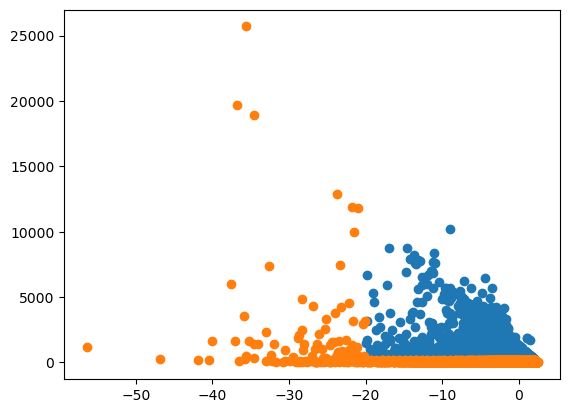

In [29]:
# 建立新的dataframe，只包含特徵A大於閾值且特徵B小於閾值的資料
df1 = new_df.query('V1 >= @threshold_A and Amount >= @threshold_B')

# 建立新的dataframe，只包含特徵A小於等於閾值或特徵B大於等於閾值的資料
df2 = new_df.query('V1 < @threshold_A or Amount < @threshold_B')

X = df1['V1']
Y = df1['Amount']
colors = df1['Class']
plt.scatter(X, Y)

X = df2['V1']
Y = df2['Amount']

plt.scatter(X, Y)
# plt.axhline(y=threshold_B, color='r', linestyle='-')
# plt.axvline(x=threshold_A, color='r', linestyle='-', ymin = threshold_A)
# plt.xlim(-5,)
# plt.ylim(0,)
plt.show()

# PCA

In [30]:
import pandas as pd
from sklearn.decomposition import PCA
import pandas as pd
from imblearn.combine import SMOTEENN

# 切割 df1 和 df2
# 假設已經切割並且得到了 df1 和 df2
class_counts = df1['Class'].value_counts()
print(class_counts)

# 取出 df1 中的特徵 X1 和目標變數 Y1
X1 = df1.iloc[:, :30]  # 假設特徵欄位從第 1 到第 28 欄位
Y1 = df1['Class']  # 假設目標變數的欄位名稱為 'binary_class'

# 進行過取樣和欠取樣
smote_enn = SMOTEENN(random_state=42)
X1_resampled, Y1_resampled = smote_enn.fit_resample(X1, Y1)

print(X1_resampled)
# 轉換成 DataFrame
df_resampled = pd.DataFrame(X1_resampled, columns=X1.columns)
df_resampled['Class'] = Y1_resampled

# 檢查目前資料的標註狀態
class_counts = df_resampled['Class'].value_counts()
print(class_counts)

0    34437
1       86
Name: Class, dtype: int64
                Time        V1        V2        V3        V4        V5  \
0       40607.000000  0.271095 -2.720489  0.427427 -0.080256 -2.077311   
1       84381.000000 -0.962227  1.260166  0.239114  0.750526 -1.412022   
2       52677.000000  0.835666 -0.888319  1.078265  0.406798 -1.312583   
3      130962.000000 -0.622267 -0.272816 -1.373829 -0.878189 -1.153609   
4      125114.000000  1.532507 -2.796943 -0.841580 -1.361421 -2.078718   
...              ...       ...       ...       ...       ...       ...   
53810   55931.742655 -3.577809 -0.939548 -0.435971  2.264610  0.707106   
53811   57946.151094 -2.331609 -0.356869 -3.441510  2.640208 -3.219354   
53812  129772.825251 -1.640517  2.474722 -5.791058  3.027859 -0.821479   
53813   41251.994700 -4.133758  4.328086 -6.675209  6.385051 -6.396396   
53814   58464.091403 -5.430082 -1.453491 -4.417217  1.669385 -3.452856   

             V6        V7        V8        V9  ...       V20   

In [31]:
# 進行 PCA
pca = PCA(n_components=2)  # 假設要降維到 2 個主成分
X1_pca = pca.fit_transform(X1_resampled)

# 取得 PCA 的方程式
pca_equation = pca.components_

# 印出 PCA 方程式
print("PCA Equation for Class 1:")
print(pca_equation)

X1_pca_df = pd.DataFrame(X1_pca)
Y1_pca_df = pd.DataFrame(Y1_resampled)
print(X1_pca_df)
print(type(Y1_pca_df))

PCA Equation for Class 1:
[[-9.99999966e-01 -1.90040265e-05  1.28526633e-05 -1.79997829e-06
   1.26187655e-05 -2.26327787e-05  2.10710450e-06 -2.45702305e-05
   5.71194293e-06 -7.65745071e-06 -1.63507547e-05  1.60451955e-05
  -2.22364448e-05  2.91369919e-06 -1.43799482e-05  3.19759587e-06
  -1.85315843e-05 -3.73890270e-05 -1.68827660e-05  4.12275078e-06
  -3.91165400e-06  7.65205691e-07 -1.95288028e-06 -7.39955055e-06
   1.72352114e-06 -2.35105831e-07  6.03871025e-07  1.65462593e-06
  -1.22352525e-06  2.49927829e-04  7.10705826e-07]
 [ 2.49783803e-04 -9.19108569e-04 -2.85398886e-03 -7.39042272e-04
   5.43662534e-04 -1.25492540e-03  1.19735174e-03  2.70168766e-03
  -1.06766272e-03  1.96946756e-04  1.87453759e-04 -1.75300114e-04
   5.27306986e-04  4.13441382e-05  7.18074264e-04  5.72174898e-05
   7.61717352e-04  1.06894998e-03  4.16707300e-04 -3.33619394e-04
   1.12029578e-03  6.63772060e-06 -3.08678201e-04 -9.17679849e-04
   2.56008973e-05 -3.15837535e-04 -2.22018106e-05  2.20538040e-04

K-fold 準確率為： 1.0
[1.0, 1.0, 1.0, 1.0, 1.0]
F1 score為： 1.0


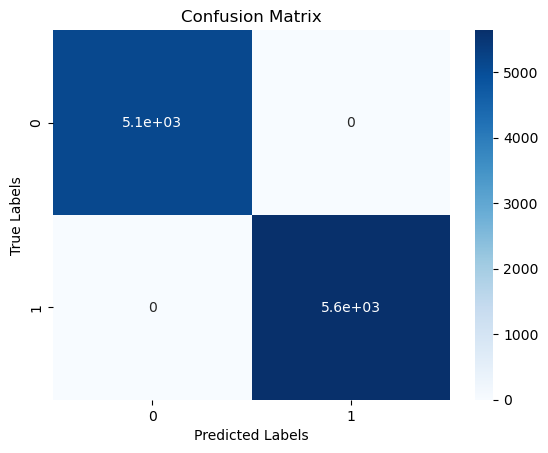

In [32]:
# 將訓練集切分為特徵和標籤
X_train = X1_pca_df
y_train = Y1_pca_df

# 創建決策樹分類器並進行訓練
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)

# 切分原始資料集為 K-fold 的驗證集
X = X1_pca_df
y = Y1_pca_df
kf = KFold(n_splits=5, shuffle=True, random_state=2)
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
    # 在驗證集上進行預測
    y_pred = clf.predict(X_test)

    # 計算準確率並添加到列表中
    accuracy = clf.score(X_test, y_test)
    accuracy_list.append(accuracy)

# 計算 K-fold 的平均準確率
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
print("K-fold 準確率為：", mean_accuracy)
print(accuracy_list)

# 計算 F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score為：", f1)

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 將混淆矩陣轉換成 DataFrame
cm_df = pd.DataFrame(cm, index=[0,1], columns=[0,1])

# 使用 seaborn 中的 heatmap 函式印出混淆矩陣
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [33]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,...,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000
mean,93103.686673,-0.568034,-1.571103,-0.368035,0.089288,-0.814185,0.415809,0.523873,-0.156409,-0.081514,...,0.135949,-0.003724,-0.034754,-0.022925,-0.011304,0.009109,-0.022499,0.007208,447.846263,0.002491
std,46779.145855,2.249789,2.135504,1.615906,1.499029,1.789096,1.551690,1.843678,1.341487,1.193656,...,0.824386,0.784817,1.178122,0.627371,0.601067,0.569104,0.482778,0.453211,498.444409,0.049849
min,1.000000,-19.989586,-29.780328,-17.681072,-5.024097,-40.427726,-17.574835,-31.764946,-73.216718,-7.701499,...,-34.830382,-7.417140,-44.807735,-2.814898,-10.295397,-1.855355,-9.390980,-8.424041,153.990000,0.000000
25%,51387.000000,-1.516124,-2.076138,-1.273223,-0.867094,-1.512333,-0.473304,-0.418644,-0.310507,-0.886897,...,-0.098138,-0.496018,-0.361389,-0.356558,-0.335930,-0.370395,-0.127924,-0.033327,200.000000,0.000000
50%,81605.000000,-0.150948,-1.234003,-0.151074,-0.002943,-0.828940,0.146160,0.280607,-0.023662,-0.127049,...,0.136388,0.026177,-0.107550,0.040586,0.051726,-0.122774,-0.041166,0.038239,287.720000,0.000000
75%,137301.000000,0.947571,-0.518017,0.752006,0.903235,-0.044143,0.990042,1.126601,0.282225,0.720574,...,0.380096,0.536251,0.264601,0.435796,0.366408,0.363019,0.043208,0.096904,494.075000,0.000000
max,172792.000000,2.138423,12.793880,3.833733,11.229502,23.046242,23.917837,44.054461,9.643419,9.112555,...,16.223696,10.503090,19.228169,3.695493,3.844345,3.517346,12.152401,16.129609,10199.440000,1.000000


In [34]:
# New_df is from the random undersample data (fewer instances)
# rond1_X = df2.drop('Class', axis=1)
# rond1_y = df2['Class']

# # T-SNE Implementation
# t0 = time.time()
# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(rond1_X.values)
# t1 = time.time()
# print("T-SNE took {:.2} s".format(t1 - t0))

# # PCA Implementation
# t0 = time.time()
# X_reduced_pca = PCA(n_components=10, random_state=42).fit_transform(rond1_X.values)
# t1 = time.time()
# print("PCA took {:.2} s".format(t1 - t0))

# # TruncatedSVD
# t0 = time.time()
# X_reduced_svd = TruncatedSVD(n_components=10, algorithm='randomized', random_state=42).fit_transform(rond1_X.values)
# t1 = time.time()
# print("Truncated SVD took {:.2} s".format(t1 - t0))

In [35]:
# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# # labels = ['No Fraud', 'Fraud']
# f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


# blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
# red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(rond1_y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(rond1_y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(rond1_y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(rond1_y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax2.set_title('PCA', fontsize=14)

# ax2.grid(True)

# ax2.legend(handles=[blue_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(rond1_y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(rond1_y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax3.set_title('Truncated SVD', fontsize=14)

# ax3.grid(True)

# ax3.legend(handles=[blue_patch, red_patch])

# plt.show()

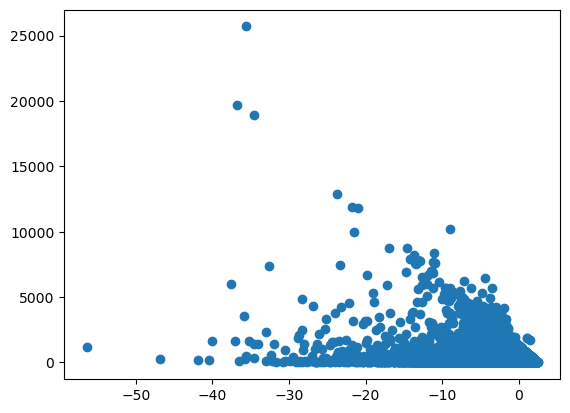

In [36]:
X = new_df['V1']
Y = new_df['Amount']

plt.scatter(X, Y)

# Whole Data

Class 被標註為1的資料中，Amount最小為： 0.0
K-fold 準確率為： 0.999247050557196
[0.999765926735068, 0.9993562859650834, 0.9991222081342046, 0.9990051692187653, 0.9989856627328587]
F1 score為： 0.7142857142857143


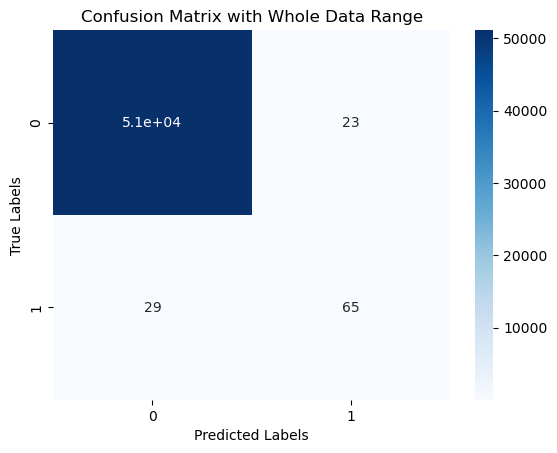

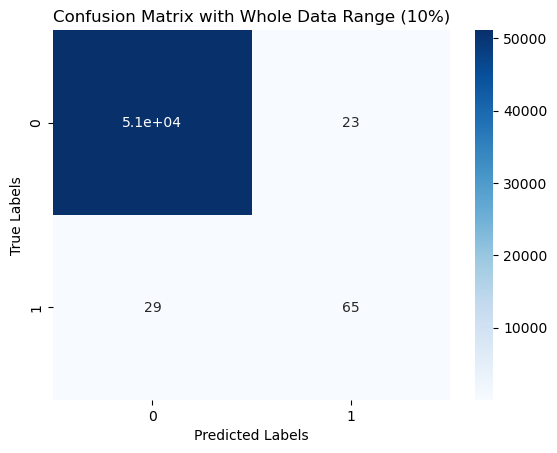

Accuracy: 0.9989856627328587
F1 Score: 0.7142857142857143
Class 被標註為1的資料中，Amount最小為： 0.0


In [37]:
# 引入需要的庫
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt


# 讀取資料集
data = new_df

# 隨機選取 38378 筆資料作為訓練集
train_data = data.sample(n=38378, random_state=1)

# 從原始資料中刪除訓練集，剩下的資料存到 df4 中
df4 = data.drop(train_data.index)

# 找到 Class 為 1 的資料中 Amount 的最小值
class_1_min_amount = train_data.loc[train_data["Class"] == 1, "Amount"].min()
print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)

# 將訓練集切分為特徵和標籤
X_train = train_data.drop(["Class"], axis=1)
y_train = train_data["Class"]

# 創建決策樹分類器並進行訓練
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

# 切分原始資料集為 K-fold 的驗證集
X = data.drop(["Class"], axis=1)
y = data["Class"]
kf = KFold(n_splits=5, shuffle=True, random_state=1)
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
    # 在驗證集上進行預測
    y_pred = clf.predict(X_test)

    # 計算準確率並添加到列表中
    accuracy = clf.score(X_test, y_test)
    accuracy_list.append(accuracy)

# 計算 K-fold 的平均準確率
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
print("K-fold 準確率為：", mean_accuracy)
print(accuracy_list)

# 計算 F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score為：", f1)

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 將混淆矩陣轉換成 DataFrame
cm_df = pd.DataFrame(cm, index=[0,1], columns=[0,1])

# 使用 seaborn 中的 heatmap 函数印出混淆矩陣
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix with Whole Data Range")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print()
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# 提取 df3 中的特徵和目標變量
Final_X_test = df3.drop("Class", axis=1)
Final_y_test = df3["Class"]

# 用模型進行預測
y_pred = clf.predict(X_test)

# 計算準確率和 F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 將混淆矩陣轉換成 DataFrame
cm_df = pd.DataFrame(cm, index=[0,1], columns=[0,1])

# 使用 seaborn 中的 heatmap 函数印出混淆矩陣
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix with Whole Data Range (10%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 印出結果
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)

# Active Learning

Class 被標註為1的資料中，Amount最小為： 156.0
K-fold 準確率為： 1.0
[1.0, 1.0, 1.0, 1.0, 1.0]
F1 score為： 1.0


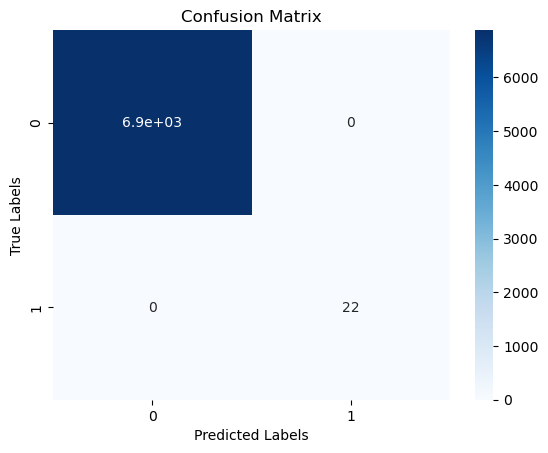

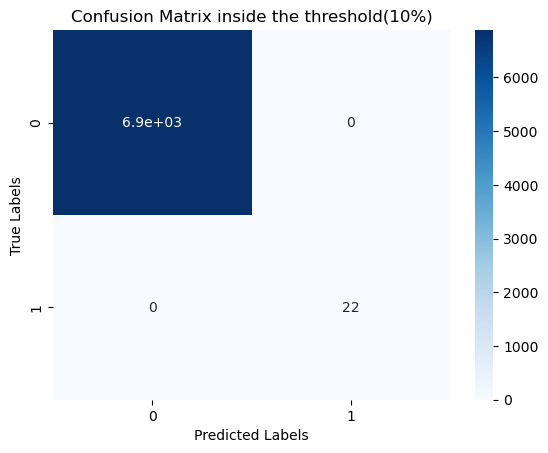

Accuracy: 1.0
F1 Score: 1.0
Class 被標註為1的資料中，Amount最小為： 156.0


In [38]:
data = df1

# 找到 Class 為 1 的資料中 Amount 的最小值
class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)

# 將訓練集切分為特徵和標籤
X_train = data.drop(["Class"], axis=1)
y_train = data["Class"]

# 創建決策樹分類器並進行訓練
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, y_train)

# 切分原始資料集為 K-fold 的驗證集
X = data.drop(["Class"], axis=1)
y = data["Class"]
kf = KFold(n_splits=5, shuffle=True, random_state=2)
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
    # 在驗證集上進行預測
    y_pred = clf.predict(X_test)

    # 計算準確率並添加到列表中
    accuracy = clf.score(X_test, y_test)
    accuracy_list.append(accuracy)

# 計算 K-fold 的平均準確率
mean_accuracy = sum(accuracy_list) / len(accuracy_list)
print("K-fold 準確率為：", mean_accuracy)
print(accuracy_list)

# 計算 F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score為：", f1)



# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 將混淆矩陣轉換成 DataFrame
cm_df = pd.DataFrame(cm, index=[0,1], columns=[0,1])

# 使用 seaborn 中的 heatmap 函数印出混淆矩陣
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print()

# 用模型進行預測
y_pred = clf.predict(X_test)

# 計算準確率和 F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 將混淆矩陣轉換成 DataFrame
cm_df = pd.DataFrame(cm, index=[0,1], columns=[0,1])

# 使用 seaborn 中的 heatmap 函数印出混淆矩陣
sns.heatmap(cm_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix inside the threshold(10%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 印出結果
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)

In [39]:
# 引入需要的庫
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 讀取資料集
data = df1

# 找到 Class 為 1 的資料中 Amount 的最小值
class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)

# 定義 K-fold 交叉驗證的參數
n_splits = 5 # 將資料集分成 5 個部分
shuffle = True # 隨機打亂資料集

# 創建 K-fold 交叉驗證物件
kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=42)

# 創建決策樹分類器
clf = DecisionTreeClassifier(random_state=42)

# 進行 K-fold 交叉驗證
scores = []
y_true = []
y_pred = []
for train_index, test_index in kf.split(data):
    X_train, X_test = data.iloc[train_index].drop(["Class"], axis=1), data.iloc[test_index].drop(["Class"], axis=1)
    y_train, y_test = data.iloc[train_index]["Class"], data.iloc[test_index]["Class"]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)
    y_true.extend(y_test)
    y_pred.extend(clf.predict(X_test))

print("準確率為：",scores)
    
# 計算平均準確率
mean_accuracy = sum(scores) / n_splits
print("平均準確率為：", mean_accuracy)

# 計算混淆矩陣
cm = confusion_matrix(y_true, y_pred)
print("混淆矩陣為：")
print(cm)

# 計算精確度
precision = precision_score(y_true, y_pred)
print("精確度為：", precision)

# 計算召回率
recall = recall_score(y_true, y_pred)
print("召回率為：", recall)

# 計算F1-score
f1 = f1_score(y_true, y_pred)
print("F1-score為：", f1)

Class 被標註為1的資料中，Amount最小為： 156.0
準確率為： [0.998551774076756, 0.9981173062997828, 0.9986965966690804, 0.9982618771726536, 0.998117033603708]
平均準確率為： 0.998348917564396
混淆矩陣為：
[[34406    31]
 [   26    60]]
精確度為： 0.6593406593406593
召回率為： 0.6976744186046512
F1-score為： 0.6779661016949152


In [40]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,...,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000,34523.000000
mean,93103.686673,-0.568034,-1.571103,-0.368035,0.089288,-0.814185,0.415809,0.523873,-0.156409,-0.081514,...,0.135949,-0.003724,-0.034754,-0.022925,-0.011304,0.009109,-0.022499,0.007208,447.846263,0.002491
std,46779.145855,2.249789,2.135504,1.615906,1.499029,1.789096,1.551690,1.843678,1.341487,1.193656,...,0.824386,0.784817,1.178122,0.627371,0.601067,0.569104,0.482778,0.453211,498.444409,0.049849
min,1.000000,-19.989586,-29.780328,-17.681072,-5.024097,-40.427726,-17.574835,-31.764946,-73.216718,-7.701499,...,-34.830382,-7.417140,-44.807735,-2.814898,-10.295397,-1.855355,-9.390980,-8.424041,153.990000,0.000000
25%,51387.000000,-1.516124,-2.076138,-1.273223,-0.867094,-1.512333,-0.473304,-0.418644,-0.310507,-0.886897,...,-0.098138,-0.496018,-0.361389,-0.356558,-0.335930,-0.370395,-0.127924,-0.033327,200.000000,0.000000
50%,81605.000000,-0.150948,-1.234003,-0.151074,-0.002943,-0.828940,0.146160,0.280607,-0.023662,-0.127049,...,0.136388,0.026177,-0.107550,0.040586,0.051726,-0.122774,-0.041166,0.038239,287.720000,0.000000
75%,137301.000000,0.947571,-0.518017,0.752006,0.903235,-0.044143,0.990042,1.126601,0.282225,0.720574,...,0.380096,0.536251,0.264601,0.435796,0.366408,0.363019,0.043208,0.096904,494.075000,0.000000
max,172792.000000,2.138423,12.793880,3.833733,11.229502,23.046242,23.917837,44.054461,9.643419,9.112555,...,16.223696,10.503090,19.228169,3.695493,3.844345,3.517346,12.152401,16.129609,10199.440000,1.000000


In [41]:
df2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,221803.00000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,...,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000
mean,95071.73990,0.089323,0.244860,0.056654,-0.014383,0.126977,-0.064330,-0.080955,0.024368,0.013583,...,-0.020782,-0.000236,0.005688,0.003825,0.000918,-0.002065,0.003131,-0.000872,32.460078,0.001623
std,47591.96447,1.891473,1.410120,1.489393,1.401648,1.260429,1.284660,1.093984,1.165850,1.081633,...,0.719596,0.716393,0.487336,0.601639,0.507745,0.467262,0.388136,0.305539,108.379160,0.040255
min,0.00000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-41.484823,-13.434066,...,-22.797604,-10.933144,-36.666000,-2.836627,-8.696627,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54663.50000,-0.854774,-0.367878,-0.819852,-0.846420,-0.552235,-0.797415,-0.572769,-0.196208,-0.608807,...,-0.239234,-0.548503,-0.140102,-0.354114,-0.315850,-0.321801,-0.063648,-0.054359,4.080000,0.000000
50%,85197.00000,0.030282,0.182513,0.224493,-0.021380,0.031206,-0.325463,0.019099,0.028940,-0.042323,...,-0.049649,0.002314,-0.004402,0.040895,0.008899,-0.037944,0.007566,0.008813,15.160000,0.000000
75%,139669.00000,1.357358,0.891833,1.067267,0.719651,0.674136,0.301019,0.514890,0.334875,0.583404,...,0.156253,0.527057,0.140993,0.440471,0.348119,0.228049,0.097674,0.073723,46.280000,0.000000
max,172788.00000,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,27.202839,8.361985,22.528412,4.584549,7.519589,3.463246,31.612198,33.847808,25691.160000,1.000000


# Pick data

In [42]:
# import pandas as pd
# import numpy as np

# def merge_data(df1, df2):
#     # 從 df2 中隨機選擇 10000 筆資料
#     df2_sample = df2.sample(n=10000, random_state=42)

#     # 將 df1 和 df2_sample 合併
#     df = pd.concat([df1, df2_sample], ignore_index=True)

#     return df


# retrain_df = merge_data(df1, df2)

# # 讀取資料集
# data = retrain_df

# # 找到 Class 為 1 的資料中 Amount 的最小值
# class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
# print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)

# # 將資料集切分為訓練集和測試集
# X = data.drop(["Class"], axis=1)
# y = data["Class"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 創建決策樹分類器並進行訓練
# clf = DecisionTreeClassifier(random_state=42)
# clf.fit(X_train, y_train)

# # 在測試集上進行預測
# y_pred = clf.predict(X_test)

# # 計算準確率
# accuracy = clf.score(X_test, y_test)
# print("準確率為：", accuracy)

# # 計算混淆矩陣
# cm = confusion_matrix(y_test, y_pred)
# print("混淆矩陣為：")
# print(cm)

# # 計算 F1-score
# f1 = f1_score(y_test, y_pred)
# print("F1-score 為：", f1)

# 外部測試

In [43]:
def merge_data(df_1, df_2):
    # 從 df2 中隨機選擇 1000 筆資料
    df2_sample = df_2.sample(n=500, random_state=42)
    
    # 從 df2 中刪除已經選擇的資料
    df_2 = df_2.drop(df2_sample.index)

    # 將 df1 和 df2_sample 合併
    df_merge = pd.concat([df_1, df2_sample], ignore_index=True)

    return df_merge, df_2

In [44]:
retrain_df = train_data
pool = df4
clf4random = clf
f1_list1 = []
for i in range(10):
    print("第",i+1,"次迭代！")
    retrain_df, pool = merge_data(retrain_df, pool)

    # 讀取資料集
    data = retrain_df

    # 找到 Class 為 1 的資料中 Amount 的最小值
#     class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
#     print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)
    class_1_min_amount = data.loc[(data["Class"] == 1) & (data["Amount"] > 10), "Amount"].min()
    print("Class 被標註為1且 Amount 大於0的資料中，Amount最小為：", class_1_min_amount)

    # 將資料集切分為訓練集和測試集
    X = data.drop(["Class"], axis=1)
    y = data["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # 創建決策樹分類器並進行訓練
    clf4random = DecisionTreeClassifier(random_state=1)
    clf4random.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = clf4random.predict(Final_X_test)

    # 計算準確率
    accuracy = clf4random.score(Final_X_test, Final_y_test)
    print("準確率為：", accuracy)

    # 計算混淆矩陣
    cm = confusion_matrix(Final_y_test, y_pred)
    print("混淆矩陣為：")
    print(cm)

    # 計算 F1-score
    f1 = f1_score(Final_y_test, y_pred)
    print("F1-score 為：", f1)
    
    f1_list1.append(f1)
    
print(f1_list1)

第 1 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990871107053826
混淆矩陣為：
[[28421    14]
 [   12    34]]
F1-score 為： 0.723404255319149
第 2 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990871107053826
混淆矩陣為：
[[28421    14]
 [   12    34]]
F1-score 為： 0.723404255319149
第 3 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990871107053826
混淆矩陣為：
[[28421    14]
 [   12    34]]
F1-score 為： 0.723404255319149
第 4 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9991222218320986
混淆矩陣為：
[[28420    15]
 [   10    36]]
F1-score 為： 0.7422680412371134
第 5 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990519995786665
混淆矩陣為：
[[28419    16]
 [   11    35]]
F1-score 為： 0.7216494845360826
第 6 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990168884519505
混淆矩陣為：
[[28422    13]
 [   15    31]]
F1-score 為： 0.688888888888889
第 7 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990871107053826
混淆矩陣為：
[[28425    10]
 [   16    30]]

In [45]:
retrain_df = df1
pool = df2
clf4random = clf
f1_list2 = []
for i in range(10):
    print("第",i+1,"次迭代！")
    retrain_df, pool = merge_data(retrain_df, pool)

    # 讀取資料集
    data = retrain_df

    # 找到 Class 為 1 的資料中 Amount 的最小值
#     class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
#     print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)
    class_1_min_amount = data.loc[(data["Class"] == 1) & (data["Amount"] > 10), "Amount"].min()
    print("Class 被標註為1且 Amount 大於0的資料中，Amount最小為：", class_1_min_amount)

    # 將資料集切分為訓練集和測試集
    X = data.drop(["Class"], axis=1)
    y = data["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # 創建決策樹分類器並進行訓練
    clf4random = DecisionTreeClassifier(random_state=1)
    clf4random.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = clf4random.predict(Final_X_test)

    # 計算準確率
    accuracy = clf4random.score(Final_X_test, Final_y_test)
    print("準確率為：", accuracy)

    # 計算混淆矩陣
    cm = confusion_matrix(Final_y_test, y_pred)
    print("混淆矩陣為：")
    print(cm)

    # 計算 F1-score
    f1 = f1_score(Final_y_test, y_pred)
    print("F1-score 為：", f1)
    f1_list2.append(f1)
    
print(f1_list2)

第 1 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 52.69
準確率為： 0.9986306660580738
混淆矩陣為：
[[28404    31]
 [    8    38]]
F1-score 為： 0.6608695652173914
第 2 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 52.69
準確率為： 0.9988413328183702
混淆矩陣為：
[[28409    26]
 [    7    39]]
F1-score 為： 0.7027027027027027
第 3 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 52.69
準確率為： 0.9989115550718023
混淆矩陣為：
[[28411    24]
 [    7    39]]
F1-score 為： 0.7155963302752294
第 4 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 52.69
準確率為： 0.9987711105649381
混淆矩陣為：
[[28409    26]
 [    9    37]]
F1-score 為： 0.6788990825688073
第 5 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 52.69
準確率為： 0.9989817773252344
混淆矩陣為：
[[28414    21]
 [    8    38]]
F1-score 為： 0.7238095238095238
第 6 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 52.69
準確率為： 0.9988413328183702
混淆矩陣為：
[[28411    24]
 [    9    37]]
F1-score 為： 0.691588785046729
第 7 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 52.69
準確率為： 0.9989115550718023
混淆矩陣為：
[[28414    21]
 [   10    3

In [46]:
# def uncertainty_sampling(X_unlabeled, model, n_samples=10000):
#     """
#     使用不確定度抽樣方法選擇下一個樣本。
#     """
#     # 預測每個樣本屬於正類的概率
#     proba = model_predict_proba(X_unlabeled, model)
    
#     # 計算每個樣本的不確定度
#     uncertainty = 1 - np.max(proba, axis=1)
    
#     # 根據不確定度選擇下一個樣本
#     idx = np.argsort(uncertainty)[-n_samples:]
    
#     return X_unlabeled[idx], idx


# def entropy_sampling(X_unlabeled, model, n_samples=10000):
#     """
#     使用熵抽樣方法選擇下一個樣本。
#     """
#     # 預測每個樣本屬於正類的概率
#     proba = model_predict_proba(X_unlabeled, model)
    
#     # 計算每個樣本的熵
#     entropy = -np.sum(proba * np.log2(proba), axis=1)
    
#     # 根據熵選擇下一個樣本
#     idx = np.argsort(entropy)[-n_samples:]
    
#     return X_unlabeled[idx], idx

# def gradient_sampling(X_unlabeled, model, n_samples=10000):
#     """
#     使用梯度抽樣方法選擇下一個樣本。
#     """
#     # 計算每個樣本對模型權重的貢獻
#     grad = np.abs(model.coef_) @ X_unlabeled.T
    
#     # 計算每個樣本的梯度
#     gradient = np.sum(grad, axis=0)
    
#     # 根據梯度選擇下一個樣本
#     idx = np.argsort(gradient)[-n_samples:]
    
#     return X_unlabeled[idx], idx

In [47]:
def uncertainty_sampling(df_1, df_2, model, n_samples=1000):
    """
    使用不確定度抽樣方法選擇下一個樣本。
    """
    X_unlabeled = df_2.drop('Class', axis=1)
    y_unlabeled = df_2['Class']
    
    # 預測每個樣本屬於正類的概率
    proba = model.predict_proba(X_unlabeled)[:, 1]
    
    # 計算每個樣本的不確定度
    uncertainty = 1 - proba
    
    # 根據不確定度選擇下一個樣本
    idx = np.argsort(uncertainty)[-n_samples:]
    
    # 將選擇的樣本添加到 df1 中
    df_selected = df_2.iloc[idx].copy()
    df_1 = pd.concat([df_1, df_selected], ignore_index=True)
    
    # 從 df2 中刪除已選擇的樣本
    df_2 = df_2.drop(index=idx)
    
    return df_1, df_2

In [48]:
retrain_df = train_data
pool = df4
clf4uncertainty = clf
f1_list3 = []
for i in range(10):
    print("第",i+1,"次迭代！")
    pool.reset_index(drop=True, inplace=True)
    retrain_df, pool = uncertainty_sampling(retrain_df, pool, clf4uncertainty, n_samples=10000)
    
#     retrain_df = pd.concat([retrain_df, pool], ignore_index=True)
    # 讀取資料集
    data = retrain_df

    # 找到 Class 為 1 的資料中 Amount 的最小值
#     class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
#     print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)
    class_1_min_amount = data.loc[(data["Class"] == 1) & (data["Amount"] > 10), "Amount"].min()
    print("Class 被標註為1且 Amount 大於0的資料中，Amount最小為：", class_1_min_amount)

    # 將資料集切分為訓練集和測試集
    X = data.drop(["Class"], axis=1)
    y = data["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # 創建決策樹分類器並進行訓練
    clf4uncertainty = DecisionTreeClassifier(random_state=1)
    clf4uncertainty.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = clf4uncertainty.predict(Final_X_test)

    # 計算準確率
    accuracy = clf4uncertainty.score(Final_X_test, Final_y_test)
    print("準確率為：", accuracy)

    # 計算混淆矩陣
    cm = confusion_matrix(Final_y_test, y_pred)
    print("混淆矩陣為：")
    print(cm)

    # 計算 F1-score
    f1 = f1_score(Final_y_test, y_pred)
    print("F1-score 為：", f1)
    f1_list3.append(f1)
    
print(f1_list3)

第 1 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9987711105649381
混淆矩陣為：
[[28417    18]
 [   17    29]]
F1-score 為： 0.6236559139784946
第 2 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9991924440855307
混淆矩陣為：
[[28424    11]
 [   12    34]]
F1-score 為： 0.7472527472527473
第 3 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9991222218320986
混淆矩陣為：
[[28420    15]
 [   10    36]]
F1-score 為： 0.7422680412371134
第 4 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990168884519505
混淆矩陣為：
[[28418    17]
 [   11    35]]
F1-score 為： 0.7142857142857143
第 5 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9992275552122467
混淆矩陣為：
[[28425    10]
 [   12    34]]
F1-score 為： 0.7555555555555555
第 6 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9988764439450862
混淆矩陣為：
[[28417    18]
 [   14    32]]
F1-score 為： 0.6666666666666666
第 7 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9988764439450862
混淆矩陣為：
[[28417    18]
 [   14    

In [49]:
retrain_df = df1
pool = df2
clf4uncertainty = clf
f1_list4 = []
for i in range(10):
    print("第",i+1,"次迭代！")
    pool.reset_index(drop=True, inplace=True)
    retrain_df, pool = uncertainty_sampling(retrain_df, pool, clf4uncertainty, n_samples=10000)
    
#     retrain_df = pd.concat([retrain_df, pool], ignore_index=True)
    # 讀取資料集
    data = retrain_df

    # 找到 Class 為 1 的資料中 Amount 的最小值
#     class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
#     print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)
    class_1_min_amount = data.loc[(data["Class"] == 1) & (data["Amount"] > 10), "Amount"].min()
    print("Class 被標註為1且 Amount 大於0的資料中，Amount最小為：", class_1_min_amount)

    # 將資料集切分為訓練集和測試集
    X = data.drop(["Class"], axis=1)
    y = data["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 創建決策樹分類器並進行訓練
    clf4uncertainty = DecisionTreeClassifier(random_state=42)
    clf4uncertainty.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = clf4uncertainty.predict(Final_X_test)

    # 計算準確率
    accuracy = clf4uncertainty.score(Final_X_test, Final_y_test)
    print("準確率為：", accuracy)

    # 計算混淆矩陣
    cm = confusion_matrix(Final_y_test, y_pred)
    print("混淆矩陣為：")
    print(cm)

    # 計算 F1-score
    f1 = f1_score(Final_y_test, y_pred)
    print("F1-score 為：", f1)
    f1_list4.append(f1)
    
print(f1_list4)

第 1 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 156.0
準確率為： 0.9988764439450862
混淆矩陣為：
[[28411    24]
 [    8    38]]
F1-score 為： 0.7037037037037037
第 2 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9987711105649381
混淆矩陣為：
[[28408    27]
 [    8    38]]
F1-score 為： 0.6846846846846848
第 3 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9986657771847899
混淆矩陣為：
[[28406    29]
 [    9    37]]
F1-score 為： 0.6607142857142857
第 4 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9989817773252344
混淆矩陣為：
[[28415    20]
 [    9    37]]
F1-score 為： 0.7184466019417476
第 5 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9988062216916541
混淆矩陣為：
[[28409    26]
 [    8    38]]
F1-score 為： 0.6909090909090908
第 6 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9988062216916541
混淆矩陣為：
[[28410    25]
 [    9    37]]
F1-score 為： 0.6851851851851853
第 7 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9989115550718023
混淆矩陣為：
[[28412    23]
 [    8    

In [50]:
# def diversity_sampling(df_1, df_2, model, n_samples=1000):
#     """
#     使用多樣性抽樣方法選擇下一個樣本。
#     """
#     X_unlabeled = df_2.drop('Class', axis=1)
#     y_unlabeled = df_2['Class']

#     # 預測每個樣本屬於正類的概率
#     proba = model.predict_proba(X_unlabeled)[:, 1]

#     # 計算每個樣本的多樣性得分
#     diversity = np.abs(proba - 0.5)

#     # 根據多樣性得分選擇下一個樣本
#     idx = np.argsort(diversity)[-n_samples:]

#     # 將選擇的樣本添加到 df1 中
#     df_selected = df_2.iloc[idx].copy()
#     df_1 = pd.concat([df_1, df_selected], ignore_index=True)

#     # 從 df2 中刪除已選擇的樣本
#     df_2 = df_2.drop(index=idx)

#     return df_1, df_2



In [51]:
# retrain_df = df1
# pool = df2
# clf4diversity = clf

# for i in range(10):
#     print("第",i+1,"次迭代！")
#     pool.reset_index(drop=True, inplace=True)
#     retrain_df, pool = diversity_sampling(retrain_df, pool, clf4diversity, n_samples=1000)
    
# #     retrain_df = pd.concat([retrain_df, pool], ignore_index=True)
#     # 讀取資料集
#     data = retrain_df

#     # 找到 Class 為 1 的資料中 Amount 的最小值
# #     class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
# #     print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)
#     class_1_min_amount = data.loc[(data["Class"] == 1) & (data["Amount"] > 10), "Amount"].min()
#     print("Class 被標註為1且 Amount 大於0的資料中，Amount最小為：", class_1_min_amount)

#     # 將資料集切分為訓練集和測試集
#     X = data.drop(["Class"], axis=1)
#     y = data["Class"]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # 創建決策樹分類器並進行訓練
#     clf4diversity = DecisionTreeClassifier(random_state=42)
#     clf4diversity.fit(X_train, y_train)

#     # 在測試集上進行預測
#     y_pred = clf4diversity.predict(X_test)

#     # 計算準確率
#     accuracy = clf4diversity.score(X_test, y_test)
#     print("準確率為：", accuracy)

#     # 計算混淆矩陣
#     cm = confusion_matrix(y_test, y_pred)
#     print("混淆矩陣為：")
#     print(cm)

#     # 計算 F1-score
#     f1 = f1_score(y_test, y_pred)
#     print("F1-score 為：", f1)
    
#     print("==外部測試==")
#     # 在測試集上進行預測
#     score_y_pred = clf4diversity.predict(score_X_test)

#     # 計算準確率
#     score_accuracy = clf4diversity.score(score_X_test, score_y_test)
#     print("準確率為：", score_accuracy)

#     # 計算混淆矩陣
#     score_cm = confusion_matrix(score_y_test, score_y_pred)
#     print("混淆矩陣為：")
#     print(score_cm)

#     # 計算 F1-score
#     f1 = f1_score(score_y_test, score_y_pred)
#     print("F1-score 為：", f1)
    
#     print("")
#     print("")
# #     retrain_df.info()
# #     pool.info()
# #     data.info()

In [52]:
pre = 56857/56863
rec = 56857/56887

f = 2 / ( (1/ pre) + (1/ rec) )
print(f)

0.9996835164835164


In [53]:
def margin_sampling(df_1, df_2, model, n_samples=1000):
    """
    使用margin_sampling選擇下一個樣本。
    """
    X_unlabeled = df_2.drop('Class', axis=1)
    y_unlabeled = df_2['Class']

    # 預測每個樣本屬於0和1的概率
    proba = model.predict_proba(X_unlabeled)

    # 計算每個樣本的邊緣得分
    margin = np.abs(proba[:, 0] - proba[:, 1])

    # 根據邊緣得分選擇下一個樣本
    idx = np.argsort(margin)[-n_samples:]

    # 將選擇的樣本添加到 df1 中
    df_selected = df_2.iloc[idx].copy()
    df_1 = pd.concat([df_1, df_selected], ignore_index=True)

    # 從 df2 中刪除被選擇的樣本
    df_2 = df_2.drop(index=idx)

    return df_1, df_2


In [54]:
retrain_df = train_data
pool = df4
clf4margin = clf
f1_list5 = []
for i in range(10):
    print("第",i+1,"次迭代！")
    pool.reset_index(drop=True, inplace=True)
    retrain_df, pool = margin_sampling(retrain_df, pool, clf4margin, n_samples=10000)
    
#     retrain_df = pd.concat([retrain_df, pool], ignore_index=True)
    # 讀取資料集
    data = retrain_df

    # 找到 Class 為 1 的資料中 Amount 的最小值
#     class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
#     print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)
    class_1_min_amount = data.loc[(data["Class"] == 1) & (data["Amount"] > 10), "Amount"].min()
    print("Class 被標註為1且 Amount 大於0的資料中，Amount最小為：", class_1_min_amount)



    # 將資料集切分為訓練集和測試集
    X = data.drop(["Class"], axis=1)
    y = data["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 創建決策樹分類器並進行訓練
    clf4margin = DecisionTreeClassifier(random_state=42)
    clf4margin.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = clf4margin.predict(Final_X_test)

    # 計算準確率
    accuracy = clf4margin.score(Final_X_test, Final_y_test)
    print("準確率為：", accuracy)

    # 計算混淆矩陣
    cm = confusion_matrix(Final_y_test, y_pred)
    print("混淆矩陣為：")
    print(cm)

    # 計算 F1-score
    f1 = f1_score(Final_y_test, y_pred)
    print("F1-score 為：", f1)
    f1_list5.append(f1)
    
print(f1_list5)

第 1 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9992275552122467
混淆矩陣為：
[[28425    10]
 [   12    34]]
F1-score 為： 0.7555555555555555
第 2 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9989817773252344
混淆矩陣為：
[[28420    15]
 [   14    32]]
F1-score 為： 0.6881720430107526
第 3 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990871107053826
混淆矩陣為：
[[28421    14]
 [   12    34]]
F1-score 為： 0.723404255319149
第 4 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990519995786665
混淆矩陣為：
[[28421    14]
 [   13    33]]
F1-score 為： 0.7096774193548387
第 5 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9991222218320986
混淆矩陣為：
[[28420    15]
 [   10    36]]
F1-score 為： 0.7422680412371134
第 6 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9988413328183702
混淆矩陣為：
[[28415    20]
 [   13    33]]
F1-score 為： 0.6666666666666666
第 7 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9991573329588147
混淆矩陣為：
[[28423    12]
 [   12    3

In [55]:
retrain_df = df1
pool = df2
clf4margin = clf
f1_list6 = []
for i in range(10):
    print("第",i+1,"次迭代！")
    pool.reset_index(drop=True, inplace=True)
    retrain_df, pool = margin_sampling(retrain_df, pool, clf4margin, n_samples=10000)
    
#     retrain_df = pd.concat([retrain_df, pool], ignore_index=True)
    # 讀取資料集
    data = retrain_df

    # 找到 Class 為 1 的資料中 Amount 的最小值
#     class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
#     print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)
    class_1_min_amount = data.loc[(data["Class"] == 1) & (data["Amount"] > 10), "Amount"].min()
    print("Class 被標註為1且 Amount 大於0的資料中，Amount最小為：", class_1_min_amount)



    # 將資料集切分為訓練集和測試集
    X = data.drop(["Class"], axis=1)
    y = data["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 創建決策樹分類器並進行訓練
    clf4margin = DecisionTreeClassifier(random_state=42)
    clf4margin.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = clf4margin.predict(X_test)

    # 計算準確率
    accuracy = clf4margin.score(X_test, y_test)
    print("準確率為：", accuracy)

    # 計算混淆矩陣
    cm = confusion_matrix(y_test, y_pred)
    print("混淆矩陣為：")
    print(cm)

    # 計算 F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-score 為：", f1)

    f1_list6.append(f1)
print(f1_list6)

第 1 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 19.04
準確率為： 0.9988770353733858
混淆矩陣為：
[[8880    3]
 [   7   15]]
F1-score 為： 0.7499999999999999
第 2 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9986244841815681
混淆矩陣為：
[[10873     7]
 [    8    17]]
F1-score 為： 0.6938775510204083
第 3 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9986826811313444
混淆矩陣為：
[[12856    13]
 [    4    32]]
F1-score 為： 0.7901234567901234
第 4 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9986581683998658
混淆矩陣為：
[[14860     9]
 [   11    25]]
F1-score 為： 0.7142857142857144
第 5 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.99899438036084
混淆矩陣為：
[[16864    12]
 [    5    24]]
F1-score 為： 0.7384615384615385
第 6 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9988362866966412
混淆矩陣為：
[[18857    13]
 [    9    26]]
F1-score 為： 0.7027027027027027
第 7 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990432910786893
混淆矩陣為：
[[20857    12]
 [    8    28]]
F

In [56]:
def entropy_sampling(df_1, df_2, model, n_samples=1000):
    """
    使用熵採樣方法選擇下一個樣本。
    """
    X_unlabeled = df_2.drop('Class', axis=1)
    y_unlabeled = df_2['Class']

    # 預測每個樣本屬於正類和負類的概率
    proba = model.predict_proba(X_unlabeled)

    # 計算每個樣本的熵得分
    entropy = -(proba * np.log2(proba)).sum(axis=1)

    # 根據熵得分選擇下一個樣本
    idx = np.argsort(entropy)[-n_samples:]

    # 將選擇的樣本添加到 df1 中
    df_selected = df_2.iloc[idx].copy()
    df_1 = pd.concat([df_1, df_selected], ignore_index=True)

    # 從 df2 中刪除已選擇的樣本
    df_2 = df_2.drop(index=idx)

    return df_1, df_2

In [57]:
retrain_df = train_data
pool = df4
clf4entropy = clf
f1_list7 = []
for i in range(10):
    print("第",i+1,"次迭代！")
    pool.reset_index(drop=True, inplace=True)
    retrain_df, pool = entropy_sampling(retrain_df, pool, clf4entropy, n_samples=10000)
    
#     retrain_df = pd.concat([retrain_df, pool], ignore_index=True)
    # 讀取資料集
    data = retrain_df

    # 找到 Class 為 1 的資料中 Amount 的最小值
#     class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
#     print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)
    
    # 找到 Class 為 1 的資料中 Amount 的最小值  ＆ 設定最低閾值
    class_1_min_amount = data.loc[(data["Class"] == 1) & (data["Amount"] > 10), "Amount"].min()
    print("Class 被標註為1且 Amount 大於0的資料中，Amount最小為：", class_1_min_amount)


    # 將資料集切分為訓練集和測試集
    X = data.drop(["Class"], axis=1)
    y = data["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # 創建決策樹分類器並進行訓練
    clf4entropy = DecisionTreeClassifier(random_state=1)
    clf4entropy.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = clf4entropy.predict(Final_X_test)

    # 計算準確率
    accuracy = clf4entropy.score(Final_X_test, Final_y_test)
    print("準確率為：", accuracy)

    # 計算混淆矩陣
    cm = confusion_matrix(Final_y_test, y_pred)
    print("混淆矩陣為：")
    print(cm)

    # 計算 F1-score
    f1 = f1_score(Final_y_test, y_pred)
    print("F1-score 為：", f1)
    f1_list7.append(f1)
    
print(f1_list7)

第 1 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990168884519505
混淆矩陣為：
[[28423    12]
 [   16    30]]
F1-score 為： 0.6818181818181819
第 2 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990168884519505
混淆矩陣為：
[[28418    17]
 [   11    35]]
F1-score 為： 0.7142857142857143
第 3 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9991924440855307
混淆矩陣為：
[[28421    14]
 [    9    37]]
F1-score 為： 0.7628865979381443
第 4 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9991573329588147
混淆矩陣為：
[[28421    14]
 [   10    36]]
F1-score 為： 0.7499999999999999
第 5 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9992275552122467
混淆矩陣為：
[[28425    10]
 [   12    34]]
F1-score 為： 0.7555555555555555
第 6 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9987711105649381
混淆矩陣為：
[[28414    21]
 [   14    32]]
F1-score 為： 0.6464646464646465
第 7 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9989466661985184
混淆矩陣為：
[[28415    20]
 [   10    

In [58]:
retrain_df = df1
pool = df2
clf4entropy = clf
f1_list8 = []
for i in range(10):
    print("第",i+1,"次迭代！")
    pool.reset_index(drop=True, inplace=True)
    retrain_df, pool = entropy_sampling(retrain_df, pool, clf4entropy, n_samples=10000)
    
#     retrain_df = pd.concat([retrain_df, pool], ignore_index=True)
    # 讀取資料集
    data = retrain_df

    # 找到 Class 為 1 的資料中 Amount 的最小值
#     class_1_min_amount = data.loc[data["Class"] == 1, "Amount"].min()
#     print("Class 被標註為1的資料中，Amount最小為：", class_1_min_amount)
    
    # 找到 Class 為 1 的資料中 Amount 的最小值  ＆ 設定最低閾值
    class_1_min_amount = data.loc[(data["Class"] == 1) & (data["Amount"] > 10), "Amount"].min()
    print("Class 被標註為1且 Amount 大於0的資料中，Amount最小為：", class_1_min_amount)


    # 將資料集切分為訓練集和測試集
    X = data.drop(["Class"], axis=1)
    y = data["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # 創建決策樹分類器並進行訓練
    clf4entropy = DecisionTreeClassifier(random_state=1)
    clf4entropy.fit(X_train, y_train)

    # 在測試集上進行預測
    y_pred = clf4entropy.predict(Final_X_test)

    # 計算準確率
    accuracy = clf4entropy.score(Final_X_test, Final_y_test)
    print("準確率為：", accuracy)

    # 計算混淆矩陣
    cm = confusion_matrix(Final_y_test, y_pred)
    print("混淆矩陣為：")
    print(cm)

    # 計算 F1-score
    f1 = f1_score(Final_y_test, y_pred)
    print("F1-score 為：", f1)
    f1_list8.append(f1)
print(f1_list8)

第 1 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 19.04
準確率為： 0.998735999438222
混淆矩陣為：
[[28409    26]
 [   10    36]]
F1-score 為： 0.6666666666666667
第 2 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990168884519505
混淆矩陣為：
[[28415    20]
 [    8    38]]
F1-score 為： 0.7307692307692308
第 3 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9991222218320986
混淆矩陣為：
[[28423    12]
 [   13    33]]
F1-score 為： 0.7252747252747253
第 4 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.998735999438222
混淆矩陣為：
[[28409    26]
 [   10    36]]
F1-score 為： 0.6666666666666667
第 5 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9989817773252344
混淆矩陣為：
[[28418    17]
 [   12    34]]
F1-score 為： 0.7010309278350515
第 6 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9990168884519505
混淆矩陣為：
[[28421    14]
 [   14    32]]
F1-score 為： 0.6956521739130435
第 7 次迭代！
Class 被標註為1且 Amount 大於0的資料中，Amount最小為： 12.31
準確率為： 0.9989817773252344
混淆矩陣為：
[[28417    18]
 [   11    35

In [59]:
print(f1_list8)

[0.6666666666666667, 0.7307692307692308, 0.7252747252747253, 0.6666666666666667, 0.7010309278350515, 0.6956521739130435, 0.7070707070707071, 0.7010309278350515, 0.6666666666666666, 0.7415730337078652]
